# Linkage Disequilibrium

Linkage disequilibrium is the **non-random association** between alleles at different genetic loci, where certain combinations occur **more or less frequently** than would be expected by chance if the loci were segregating independently.

# Graphical Summary

![Fig](./graphical_summary/slides/Slide4.png)

# Key Formula

Given a standardized genotype matrix $\mathbf{X}$ (each column has mean 0 and variance 1), the LD matrix can be computed as:

$$
\mathbf{R} = \frac{\mathbf{X}^T \mathbf{X}}{N}
$$

where:

- $\mathbf{X}$ is the centered genotype matrix
- $N$ is the number of individuals

When $\mathbf{X}$ is scaled, the covariance matrix is the same as correlation matrix.

# Technical Details

Each element in $\mathbf{R}$ can be denoted as $r_{ij}$, the correlation between the $i$-th and $j$-th variants, ranging from -1 to 1. If it is 1 or -1, it means that the two variants are in **perfect LD** (markers are perfect proxies for each other). If $r_{ij}^2=0$, it indicates that no association between markers.

## Interpreting LD Values

- **High LD ($r_{ij}^2 > 0.8$)**:
  - Alleles at different loci appear together **much more frequently** than expected
  - Frequencies of alleles in high LD are similar to each other
  - Markers can often serve as proxies for each other in genetic studies
  - Likely physical proximity on chromosome or recent selection
  - Less recombination between markers

- **Moderate LD ($0.2 < r_{ij}^2 < 0.8$)**:
  - Some association between loci, but not strong enough for perfect tagging
  - Partial information about one locus given the other

- **Low LD ($r_{ij}^2 < 0.2$)**:
  - Loci segregate nearly independently
  - May indicate distant physical location or sufficient time for recombination

## LD Blocks

**LD blocks** are genome regions with consistently high LD among SNPs, separated by recombination hotspots. SNPs within a block are highly correlated and inherited together as haplotypes (introduced later in [Lecture: factor analysis](https://statfungen.github.io/statgen-primer/factor_analysis.html)).

**Key features**:
- Block size: typically a few kb to >100 kb
- Define natural haplotype units for analysis
- Allow efficient tagging: genotype fewer SNPs to capture maximum information
- Visualized as triangular LD heatmaps

**Population differences**:
- **African**: Shorter blocks (~5-15 kb) due to older, larger ancestral population
- **European**: Intermediate blocks (~15-50 kb) from out-of-Africa bottleneck
- **East Asian**: Longer blocks (>50 kb) from recent bottlenecks
- **Isolated populations** (Finnish, Sardinian): Most extensive LD from founder effects

# Related Topics

- [genotype coding](https://statfungen.github.io/statgen-primer/genotype_coding.html)
- [minor allele frequency](https://statfungen.github.io/statgen-primer/minor_allele_frequency.html)

# Example

We've learned how to encode genotypes and standardize them, but what happens when we look at relationships between different variants? Are genetic variants independent of each other, or do they show patterns of correlation?

Let's use our familiar dataset of 5 individuals at 3 variants to explore how genetic variants can be correlated with each other, and what this correlation matrix tells us about the genetic structure in our sample.

In [1]:
# Clear the environment
rm(list = ls())

# Define genotypes for 5 individuals at 3 variants
# These represent actual alleles at each position
# For example, Individual 1 has genotypes: CC, CT, AT
genotypes <- c(
 "CC", "CT", "AT",  # Individual 1
 "TT", "TT", "AA",  # Individual 2
 "CT", "CT", "AA",  # Individual 3
 "CC", "TT", "AA",  # Individual 4
 "CC", "CC", "TT"   # Individual 5
)
# Reshape into a matrix
N = 5
M = 3
geno_matrix <- matrix(genotypes, nrow = N, ncol = M, byrow = TRUE)
rownames(geno_matrix) <- paste("Individual", 1:N)
colnames(geno_matrix) <- paste("Variant", 1:M)

alt_alleles <- c("T", "C", "T")

# Convert to raw genotype matrix using the additive / dominant / recessive model
Xraw_additive <- matrix(0, nrow = N, ncol = M) # dount number of non-reference alleles

rownames(Xraw_additive) <- rownames(geno_matrix)
colnames(Xraw_additive) <- colnames(geno_matrix)

for (i in 1:N) {
  for (j in 1:M) {
    alleles <- strsplit(geno_matrix[i,j], "")[[1]]
    Xraw_additive[i,j] <- sum(alleles == alt_alleles[j])
  }
}

Then we scale the genotype matrix so that each **column (variant)** has mean 0 and variance 1.

In [2]:
X <- scale(Xraw_additive, center = TRUE, scale = TRUE)
X

,Variant 1,Variant 2,Variant 3
Individual 1,-0.6708204,0.2390457,0.4472136
Individual 2,1.5652476,-0.9561829,-0.6708204
Individual 3,0.4472136,0.2390457,-0.6708204
Individual 4,-0.6708204,-0.9561829,-0.6708204
Individual 5,-0.6708204,1.4342743,1.5652476


We use the `cor` function in R to calculate the correlation:

In [3]:
R = cor(X)
R

,Variant 1,Variant 2,Variant 3
Variant 1,1.0000000,-0.4677072,-0.562500
Variant 2,-0.4677072,1.0000000,0.868599
Variant 3,-0.5625000,0.8685990,1.000000


We also verify that the correlation matrix is identical to the covariance matrix:

In [4]:
cov(X)

,Variant 1,Variant 2,Variant 3
Variant 1,1.0000000,-0.4677072,-0.562500
Variant 2,-0.4677072,1.0000000,0.868599
Variant 3,-0.5625000,0.8685990,1.000000


# Supplementary

## Graphical Summary

In [5]:
# Load required library
library(corrplot)
png("/Users/serenadong/20240517_files_Rui/research_projects/statgen-primer/figures/LD_cor.png", width = 800, height = 800, res = 150, bg = "transparent")
# Create correlation heatmap with reversed order
corrplot(R, method = "color", 
         col = colorRampPalette(c("blue", "white", "red"))(200),
         addCoef.col = "white",  # Change coefficient color to white
         number.cex = 2,       # Make font bigger (default is 1)
         number.digits = 3,      # Keep 3 digits
         tl.col = "black",       # Text label color
         tl.srt = 0,             # No angle (horizontal text)
         tl.cex = 1.5,           # Make variable labels larger
         tl.offset = 0.8,        # Move top labels further up
         is.corr = TRUE,         # Set to TRUE for correlation matrix
         order = "original",     # Keep original order
         cl.pos = "r",           # Position color legend on right
         cl.ratio = 0.2,         # Make legend wider
         cl.offset = 0.5,        # Move legend further from the plot
         addgrid.col = "white")        # Set grid line width
dev.off()

corrplot 0.95 loaded



agg_record_1125177722 
                    2

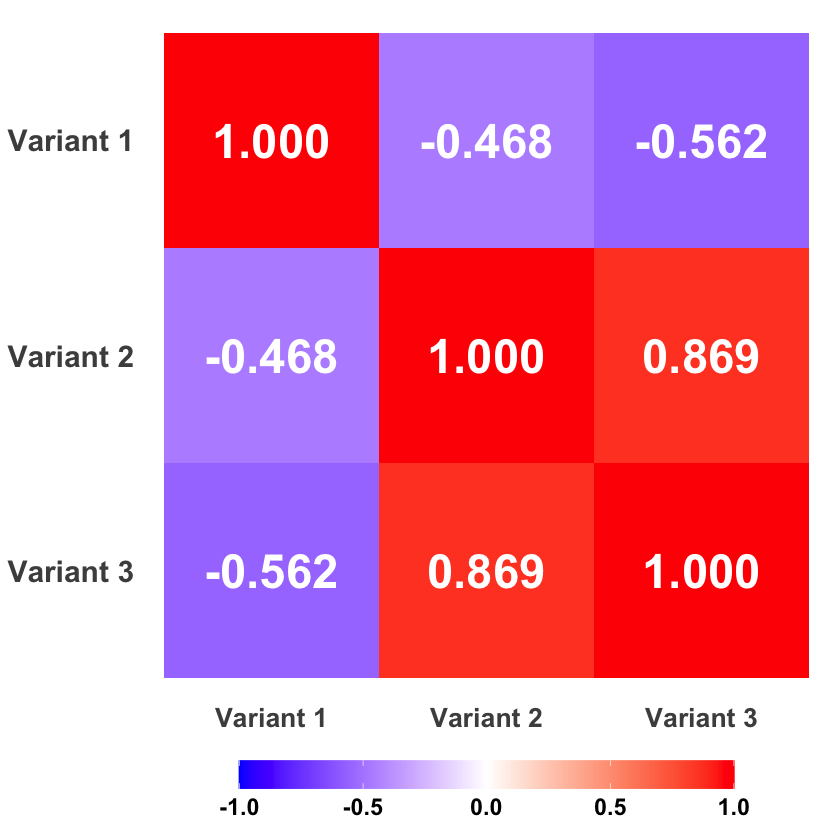

In [6]:
library(ggplot2)
library(reshape2)

R_melted <- melt(R)
colnames(R_melted) <- c("Var1", "Var2", "value")

# Create the plot
p <- ggplot(R_melted, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  geom_text(aes(label = sprintf("%.3f", value)), color = "white", size = 10, fontface = "bold") +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", 
                       midpoint = 0, limits = c(-1, 1)) +
  scale_y_discrete(limits = rev) +
  theme_minimal() +
  theme(
    axis.title = element_blank(),
    axis.text.x = element_text(size = 16, face = "bold"),  
    axis.text.y = element_text(size = 18, face = "bold"),
    legend.title = element_blank(),
    legend.text = element_text(size = 14, face = "bold"),
    legend.position = "bottom",
    legend.key.width = unit(2.1, "cm"), 
    panel.grid = element_blank(),
    panel.background = element_rect(fill = "transparent", color = NA),
    plot.background = element_rect(fill = "transparent", color = NA)
  ) +
  coord_fixed() +
  labs(fill = "Correlation")

print(p)

# Save with transparent background
dir.create("./figures", showWarnings = FALSE, recursive = TRUE)
ggsave("./figures/LD_cor.png", plot = p, width = 7, height = 6, 
       bg = "transparent", dpi = 150)